# MOVIE GENRE CLASSIFICATION

## IMPORTING THE NECESSARY LIBRARIES

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

## LOADING THE TRAINING DATA SETS

In [10]:
#Loading the training data
train_path = "D:/CODING/ML/Projects/Movie_Genre_Classification/train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [11]:
print(train_data.describe())

                                 Title    Genre  \
count                            54214    54214   
unique                           54214       27   
top      Oscar et la dame rose (2009)    drama    
freq                                 1    13613   

                                              Description  
count                                               54214  
unique                                              54086  
top      Grammy - music award of the American academy ...  
freq                                                   12  


In [12]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None


In [13]:
print(train_data.isnull().sum())

Title          0
Genre          0
Description    0
dtype: int64


In [14]:
#Loading the test data
test_path = "D:/CODING/ML/Projects/Movie_Genre_Classification/test_data.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')
test_data.head()

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


## EDA & VISUALIZATIONS

C:\Users\golum\AppData\Local\Temp\ipykernel_15044\699193057.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='icefire')
C:\Users\golum\AppData\Local\Temp\ipykernel_15044\699193057.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts, palette='icefire')


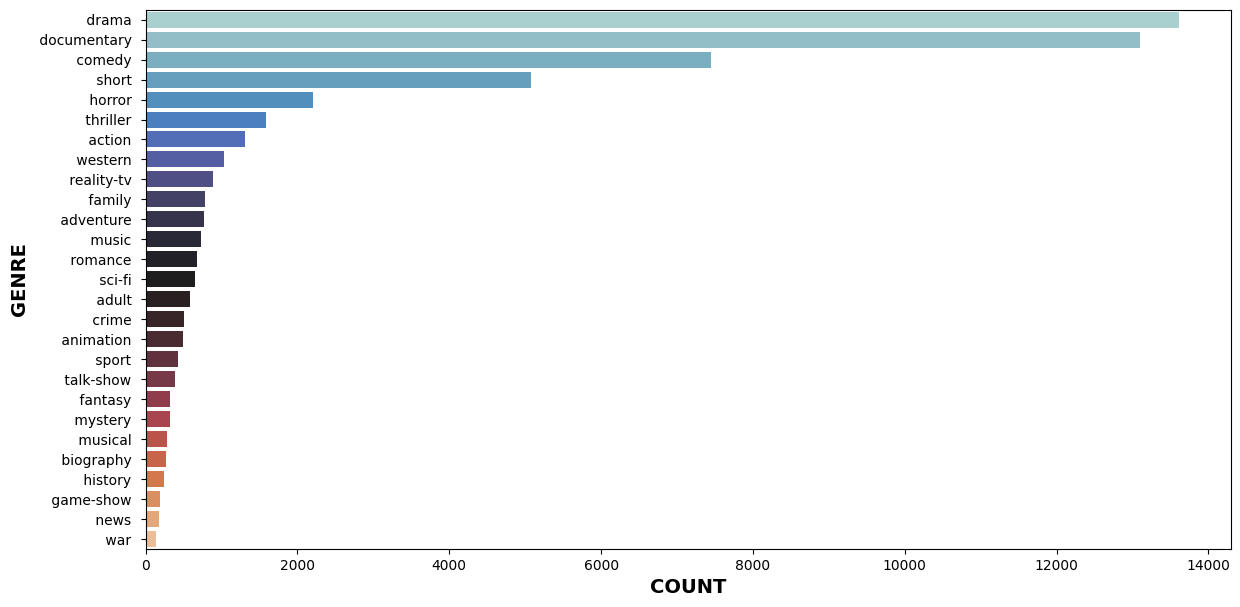

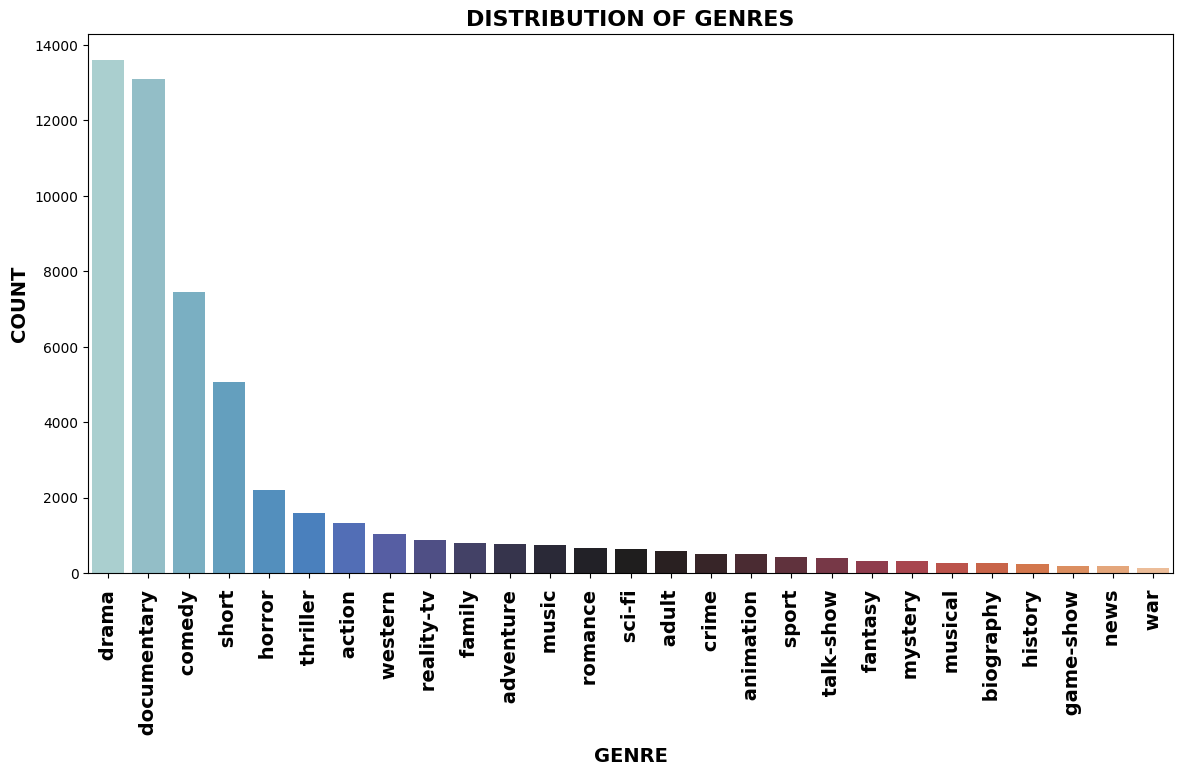

In [15]:
# Plot the distribution of genres in the training data
plt.figure(figsize=(14,7))
sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='icefire')
plt.xlabel('COUNT', fontsize=14, fontweight='bold')
plt.ylabel('GENRE', fontsize=14, fontweight='bold')
# Plot the distribution of genres using a bar plot
plt.figure(figsize=(14,7))
counts = train_data['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='icefire')
plt.xlabel('GENRE', fontsize=14, fontweight='bold')
plt.ylabel('COUNT', fontsize=14, fontweight='bold')
plt.title('DISTRIBUTION OF GENRES', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

## DATA PROCESSING AND TEXT CLEANING

In [ ]:
#Initialise the STEMMER and STOPWORDS
nltk.download('punkt')
nltk.download('stopwords')
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))
#Defining the clean text function
def clean_text(text):
    text = text.lower() #lowercase all characters
    text = re.sub(r'@\S+', '', text) #removes twitter handles
    text = re.sub(r'http\S+', '', text) #removes URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z\s]", ' ', text) #keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english') #remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

# Apply the clean_text function to the 'Description' column in the training and test data
train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
C:\Users\golum\AppData\Local\Temp\ipykernel_15044\1199488195.py:18: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\golum\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\golum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## CONTINUE DATA PROCESSING

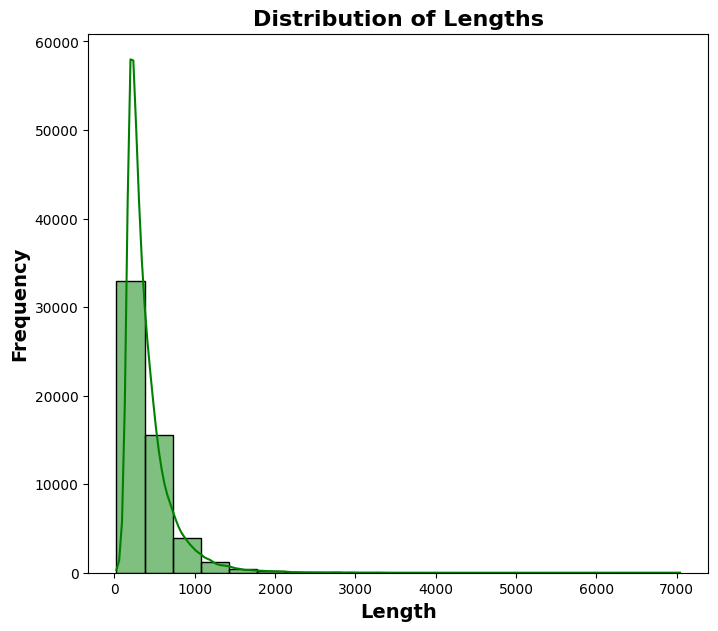

In [30]:
# Calculate the length of cleaned text
train_data['length_Text_cleaning'] = train_data['Text_cleaning'].apply(len)
# Visualize the distribution of text lengths
plt.figure(figsize=(8, 7))
sns.histplot(data=train_data, x='length_Text_cleaning', bins=20, kde=True, color='green')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

## TEXT VECTORIZATION USING TF-IDF

In [31]:
# Initialize the TF-TDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
# Fit and transform the training data 
X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])
# Transform the test data
X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])

## SPLIT DATA AMD TRAIN A MODEL USING NAIVE BAYES CLASSIFIER

In [32]:
# Split the data into training and development(cross validation) sets
X = X_train
y = train_data['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train a Multinomial Naive Bayes Classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
# Make predicitons on the validation set
y_pred = classifier.predict(X_val)
# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.4462787051553998


D:\CODING\PYTHON\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\CODING\PYTHON\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.62      0.04      0.08      1443
       crime        0.00      0.00      0.00       107
 documentary        0.54      0.90      0.67      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

D:\CODING\PYTHON\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
